In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_country=pd.read_csv('Data_Negara_HELP.csv')
data_country

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## 1. Tahap Preprocessing data

### Data Filtering


In [3]:
# Handling missing value
data_country.isnull().sum() #muncul 0 null data

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [4]:
#filter data berdasarkan jumlah kematian anak, harapan hidup, dan jumlah fertiliti

country_life=data_country[["Negara","Kematian_anak", "Kesehatan", "Harapan_hidup", "Jumlah_fertiliti"]]
country_life.sort_values(["Kematian_anak", "Kesehatan","Harapan_hidup","Jumlah_fertiliti"], ascending="False, False, True, False")

country_life

,Negara,Kematian_anak,Kesehatan,Harapan_hidup,Jumlah_fertiliti
0,Afghanistan,90.2,7.58,56.2,5.82
1,Albania,16.6,6.55,76.3,1.65
2,Algeria,27.3,4.17,76.5,2.89
3,Angola,119.0,2.85,60.1,6.16
4,Antigua and Barbuda,10.3,6.03,76.8,2.13
...,...,...,...,...,...
162,Vanuatu,29.2,5.25,63.0,3.50
163,Venezuela,17.1,4.91,75.4,2.47
164,Vietnam,23.3,6.84,73.1,1.95
165,Yemen,56.3,5.18,67.5,4.67


In [5]:
#data-data ekonomi

country_economy=data_country[["Negara","Ekspor","Impor","Pendapatan","Inflasi","GDPperkapita"]]
country_economy.sort_values(["Ekspor","Impor","Pendapatan","Inflasi","GDPperkapita"], ascending="False, True, True, False, True")
country_economy

,Negara,Ekspor,Impor,Pendapatan,Inflasi,GDPperkapita
0,Afghanistan,10.0,44.9,1610,9.44,553
1,Albania,28.0,48.6,9930,4.49,4090
2,Algeria,38.4,31.4,12900,16.10,4460
3,Angola,62.3,42.9,5900,22.40,3530
4,Antigua and Barbuda,45.5,58.9,19100,1.44,12200
...,...,...,...,...,...,...
162,Vanuatu,46.6,52.7,2950,2.62,2970
163,Venezuela,28.5,17.6,16500,45.90,13500
164,Vietnam,72.0,80.2,4490,12.10,1310
165,Yemen,30.0,34.4,4480,23.60,1310


## 2. EDA

### Statistic Descriptive Country_life

In [6]:
country_life.describe()

,Kematian_anak,Kesehatan,Harapan_hidup,Jumlah_fertiliti
count,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6.815689,70.555689,2.947964
std,40.328931,2.746837,8.893172,1.513848
min,2.600000,1.810000,32.100000,1.150000
25%,8.250000,4.920000,65.300000,1.795000
50%,19.300000,6.320000,73.100000,2.410000
75%,62.100000,8.600000,76.800000,3.880000
max,208.000000,17.900000,82.800000,7.490000


In [7]:
#menghitung covariance
mean_country_life=country_life.mean(axis=0)
country_life_withoutmean=country_life-mean_country_life

#varians masing-masing set
country_life_withoutmean.var()

#menghitung covariance
cov_country_life=country_life_withoutmean.cov()
cov_country_life

,Harapan_hidup,Jumlah_fertiliti,Kematian_anak,Kesehatan
Harapan_hidup,79.088507,-10.243585,-318.008262,5.146808
Jumlah_fertiliti,-10.243585,2.291734,51.801162,-0.817828
Kematian_anak,-318.008262,51.801162,1626.422713,-22.199943
Kesehatan,5.146808,-0.817828,-22.199943,7.545116


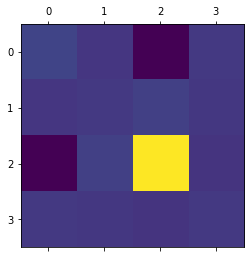

In [8]:
plt.matshow(cov_country_life)
plt.show()

In [9]:
plt.savefig('covarianscountrylife.png')

<Figure size 432x288 with 0 Axes>

In [10]:
##mencari koefisien korelasi untuk mengetahui ukuran hubungan variabel acak

##korelasi kematian dan kesehatan
corr_matrix_12=np.corrcoef(country_life.iloc[:,1], country_life.iloc[:,2])
print("Korelasi hubungan data kematian dan health spending : \n", corr_matrix_12)

Korelasi hubungan data kematian dan health spending : 
 [[ 1.         -0.20040206]
 [-0.20040206  1.        ]]


In [11]:
##korelasi jumlah kematian dan jumlah fertiliti

corr_matrix_14=np.corrcoef(country_life.iloc[:,1], country_life.iloc[:,4])
print("Korelasi hubungan data jumlah kematian dan jumlah fertiliti : \n", corr_matrix_14)

Korelasi hubungan data jumlah kematian dan jumlah fertiliti : 
 [[1.         0.84847811]
 [0.84847811 1.        ]]


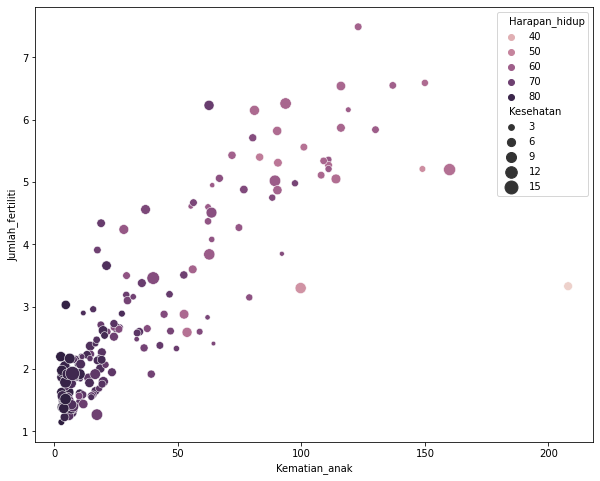

In [12]:
##visualisasi korelasi data

plt.figure(figsize=(10,8))
sns.scatterplot(
    data=country_life, x=country_life.iloc[:,1], y=country_life.iloc[:,4], 
    hue=country_life.iloc[:,3], size=country_life.iloc[:,2], 
    sizes=(20,200))

In [13]:
plt.savefig('corelationscountrylife.png')

<Figure size 432x288 with 0 Axes>

### Statistic Descriptive Country_economy

In [14]:
country_economy.describe()

,Ekspor,Impor,Pendapatan,Inflasi,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,41.108976,46.890215,17144.688623,7.781832,12964.155689
std,27.412010,24.209589,19278.067698,10.570704,18328.704809
min,0.109000,0.065900,609.000000,-4.210000,231.000000
25%,23.800000,30.200000,3355.000000,1.810000,1330.000000
50%,35.000000,43.300000,9960.000000,5.390000,4660.000000
75%,51.350000,58.750000,22800.000000,10.750000,14050.000000
max,200.000000,174.000000,125000.000000,104.000000,105000.000000


In [15]:
#menghitung covariance
mean_country_economy=country_economy.mean(axis=0)
country_economy_withoutmean=country_economy-mean_country_economy

#varians masing-masing set
country_economy_withoutmean.var()

#menghitung covariance
cov_country_economy=country_economy_withoutmean.cov()
cov_country_economy

,Ekspor,GDPperkapita,Impor,Inflasi,Pendapatan
Ekspor,751.418298,2.103785e+05,489.350622,-31.090078,2.730946e+05
GDPperkapita,210378.470377,3.359414e+08,51250.050217,-42940.421636,3.164430e+08
Impor,489.350622,5.125005e+04,586.104198,-63.208898,5.712872e+04
Inflasi,-31.090078,-4.294042e+04,-63.208898,111.739781,-3.011012e+04
Pendapatan,273094.598023,3.164430e+08,57128.721588,-30110.122438,3.716439e+08


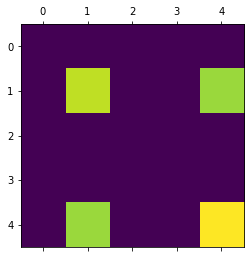

In [16]:
plt.matshow(cov_country_economy)
plt.show()

In [17]:
plt.savefig('covarianscountryeconomy.png')

<Figure size 432x288 with 0 Axes>

In [48]:
##mencari koefisien korelasi untuk mengetahui ukuran hubungan variabel acak

##korelasi ekspor dan inflasi
corr_matrix_economy_14=np.corrcoef(country_economy.iloc[:,3], country_economy.iloc[:,4])
print("Korelasi hubungan data kematian dan health spending : \n", corr_matrix_economy_14)

##terjadi hubungan kuat antara ekspor dan inflasi, karena inflasi sangat menurunkan kualitas ekspor dan negara cenderung melakukan impor

Korelasi hubungan data kematian dan health spending : 
 [[ 1.       -0.147756]
 [-0.147756  1.      ]]


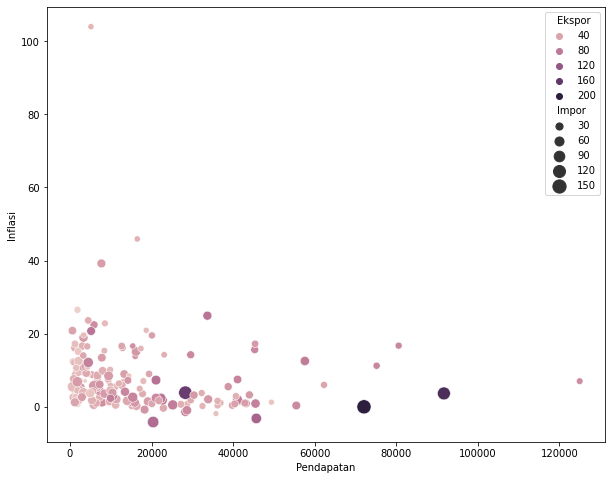

In [49]:
##visualisasi korelasi data

plt.figure(figsize=(10,8))
sns.scatterplot(
    data=country_economy, x=country_economy.iloc[:,3], y=country_economy.iloc[:,4], 
    hue=country_economy.iloc[:,1], size=country_economy.iloc[:,2], 
    sizes=(20,200))

In [50]:
plt.savefig('corelationscountryeconomy.png')

<Figure size 432x288 with 0 Axes>

### grafik skew

<Figure size 720x576 with 0 Axes>

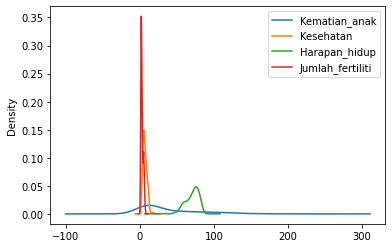

tingkat skewwness :  Kematian_anak       1.450774
Kesehatan           0.705746
Harapan_hidup      -0.970996
Jumlah_fertiliti    0.967092
dtype: float64
kurtosis :  <bound method DataFrame.kurt of                   Negara  Kematian_anak  ...  Harapan_hidup  Jumlah_fertiliti
0            Afghanistan           90.2  ...           56.2              5.82
1                Albania           16.6  ...           76.3              1.65
2                Algeria           27.3  ...           76.5              2.89
3                 Angola          119.0  ...           60.1              6.16
4    Antigua and Barbuda           10.3  ...           76.8              2.13
..                   ...            ...  ...            ...               ...
162              Vanuatu           29.2  ...           63.0              3.50
163            Venezuela           17.1  ...           75.4              2.47
164              Vietnam           23.3  ...           73.1              1.95
165                Yemen

In [51]:
#skew country life

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
country_life.plot(kind='density')
plt.show()
print("tingkat skewwness : ", country_life.skew())
print("kurtosis : ", country_life.kurtosis)

In [52]:
plt.savefig('skewcountrylife.png')

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

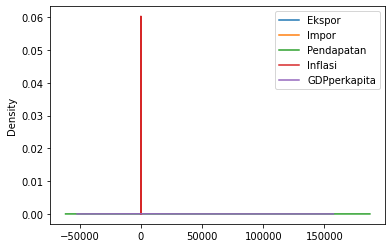

tingkat skewwness :  Ekspor          2.445824
Impor           1.905276
Pendapatan      2.231480
Inflasi         5.154049
GDPperkapita    2.218051
dtype: float64
kurtosis :  <bound method DataFrame.kurt of                   Negara  Ekspor  Impor  Pendapatan  Inflasi  GDPperkapita
0            Afghanistan    10.0   44.9        1610     9.44           553
1                Albania    28.0   48.6        9930     4.49          4090
2                Algeria    38.4   31.4       12900    16.10          4460
3                 Angola    62.3   42.9        5900    22.40          3530
4    Antigua and Barbuda    45.5   58.9       19100     1.44         12200
..                   ...     ...    ...         ...      ...           ...
162              Vanuatu    46.6   52.7        2950     2.62          2970
163            Venezuela    28.5   17.6       16500    45.90         13500
164              Vietnam    72.0   80.2        4490    12.10          1310
165                Yemen    30.0   34.4      

In [53]:
#skew country economy

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
country_economy.plot(kind='density')
plt.show()
print("tingkat skewwness : ", country_economy.skew())
print("kurtosis : ", country_economy.kurtosis)

In [54]:
plt.savefig('skewcountrylife.png')

<Figure size 432x288 with 0 Axes>

### Multivariate Analysis

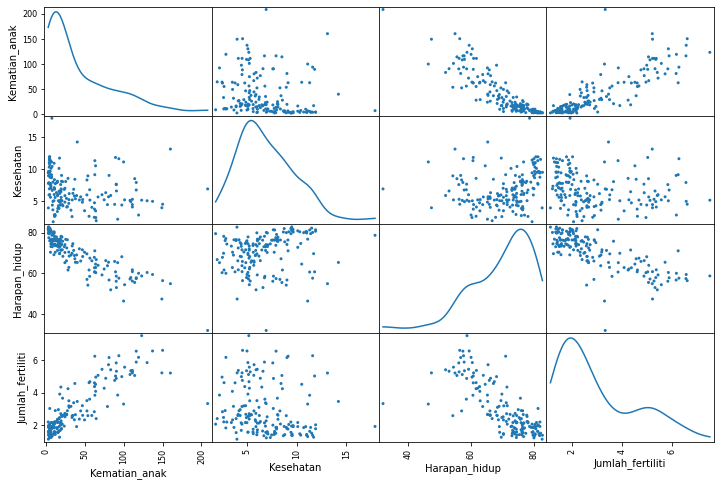

In [55]:
## Country Life Multivariate Analysis

pd.plotting.scatter_matrix(country_life.iloc[:,1:5], alpha=1, 
                           diagonal="kde", figsize=(12,8))
plt.show()

In [56]:
plt.savefig('mult1.png')

<Figure size 432x288 with 0 Axes>

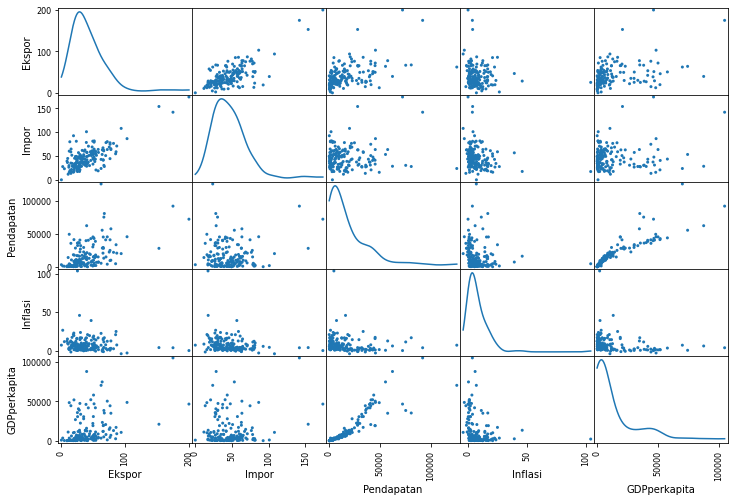

In [57]:
pd.plotting.scatter_matrix(country_economy.iloc[:,1:6], alpha=1, 
                           diagonal="kde", figsize=(12,8))
plt.show()

In [58]:
plt.savefig('mult2.png')

<Figure size 432x288 with 0 Axes>

## 3. K-Means Clustering

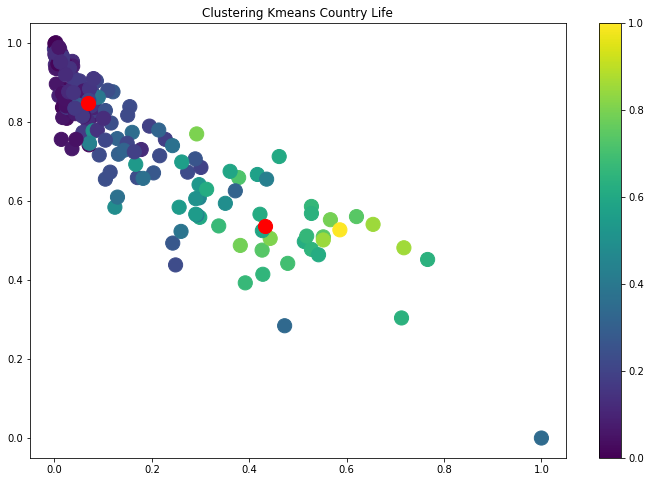

In [59]:
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(12,8))

scaler=MinMaxScaler()
country_life_scaled=scaler.fit_transform(country_life.iloc[:,1:5])


from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, random_state=123)
kmeans.fit(country_life_scaled)
output=plt.scatter(
    x=country_life_scaled[:,0], 
    y=country_life_scaled[:,2], 
    c=country_life_scaled[:,3],
    s=200, alpha=1, marker="o");

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,2], c="red", s=200, alpha=1 , marker="o");

plt.title("Clustering Kmeans Country Life")
plt.colorbar(output)
plt.show()

In [60]:
plt.savefig('clust1.png')

<Figure size 432x288 with 0 Axes>

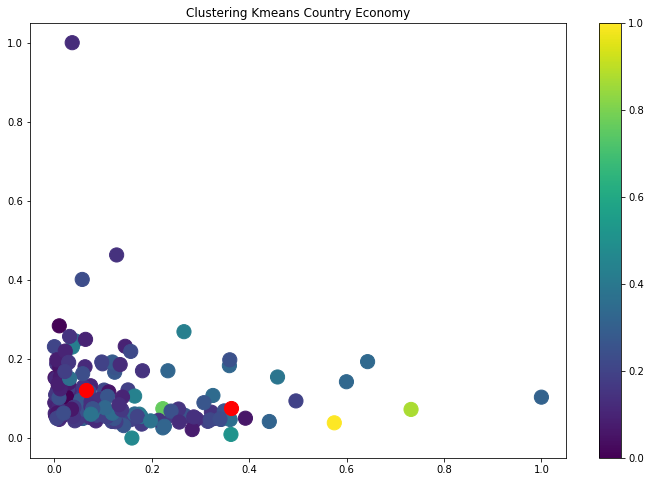

In [61]:
plt.figure(figsize=(12,8))

country_economy_scaled=scaler.fit_transform(country_economy.iloc[:,1:6])

from sklearn.cluster import KMeans
kmeans2=KMeans(n_clusters=2, random_state=123)
kmeans2.fit(country_economy_scaled)
output=plt.scatter(
    x=country_economy_scaled[:,2], 
    y=country_economy_scaled[:,3], 
    c=country_economy_scaled[:,0],
    s=200, alpha=1, marker="o");

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,2], centers[:,3], c='red', s=200, alpha=1 , marker='o');

plt.title("Clustering Kmeans Country Economy")
plt.colorbar(output)
plt.show()

In [62]:
plt.savefig('clust2.png')

<Figure size 432x288 with 0 Axes>